# Лабораторная работа №8: Классификация текстов 

### Каткова Полина


1. Найти и загрузить любой датасет для классификации текстов

Ссылка: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

Там содержатся 2 фала - с настоящимии и ложными новостями. Будем использовать файл в правдивыми новостями.

Столбцы:

title - заголовок новостей

text - содержание новостей

subject - тема, бинарный признак (politicsNews, worldnews)

date - дата


In [1]:
import pandas as pd
import numpy as np
import sklearn

In [31]:
df = pd.read_csv("True.csv")
print( df.shape )
df.head( 2 )

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [32]:
#выбираем 10к записей
df = df.loc[5000:15000]
df

,title,text,subject,date
5000,Trump budget opens new fight among Republicans,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"March 13, 2017"
5001,Trump tried to call New York prosecutor Bharar...,WASHINGTON (Reuters) - Two days before U.S. At...,politicsNews,"March 12, 2017"
5002,NY prosecutor’s office likely to plot similar ...,NEW YORK/WASHINGTON (Reuters) - The Trump admi...,politicsNews,"March 13, 2017"
5003,Puerto Rico creditors urge extension of fiscal...,(Reuters) - A group holding more than $10 bill...,politicsNews,"March 13, 2017"
5004,Biden says would have liked to be the U.S. pre...,"AUSTIN, Texas (Reuters) - Former Democratic U....",politicsNews,"March 12, 2017"
...,...,...,...,...
14996,Exclusive: Japan to delay multi-billion dollar...,TOKYO (Reuters) - Japan will delay a decision ...,worldnews,"November 13, 2017"
14997,"Strong quake hits Costa Rica, no reports of ma...",SAN JOSE (Reuters) - A strong 6.5 magnitude qu...,worldnews,"November 13, 2017"
14998,United resumes Newark-Delhi flights after halt...,NEW YORK/SINGAPORE (Reuters) - United Airlines...,worldnews,"November 12, 2017"
14999,Freeport Indonesia mine access road reopened a...,JAKARTA (Reuters) - The Indonesian unit of Fre...,worldnews,"November 13, 2017"


2. Выводите в цикле целиком текст первых нескольких записей

In [33]:
print(df.text[5000] + '\n')
print(df.text[5001] + '\n')

WASHINGTON (Reuters) - Republican U.S. Representative Todd Rokita keeps a clock hanging on the wall of his Capitol Hill office that tracks the U.S. government’s rising debt in real time and reminds him of his top priority: reining in federal spending. “I was sent here on a fiscal note,” said the Indiana lawmaker and vice chairman of the House of Representatives Budget Committee, who rode a Republican wave during his first election to Congress in 2010. When President Donald Trump unveils his budget for the 2018 fiscal year on Thursday, Rokita will be among many conservative Republicans cheering proposed cuts to domestic programs that would pay for a military buildup. More moderate Republicans are less enthusiastic and worry Trump’s budget could force lawmakers to choose between opposing the president or backing reductions in popular programs such as aid for disabled children and hot meals for the elderly. “What you would hope is that the administration is aware of the difficulty of some

3. Найти и удалить малоинформативные повторяющиеся участки

In [34]:
import re 
for i in range(len(df)):
    # удаляем выражения типа "in 2018"
    df.text[i+5000] = re.sub(r'in \d{4}', '', df.text[i+5000])
    # удаляем выражения типа "2018"
    df.text[i+5000] = re.sub(r'\d{4}','', df.text[i+5000])
    # удаляем выражения типа "Dec. 8"
    df.text[i+5000] = re.sub(r'\w{3}\. \d{1}?\.','', df.text[i+5000])
    # удаляем первое слово  
    df.text[i+5000] = re.sub(r'^\w+','', df.text[i+5000])
    # удаляем '(Reuters)' 
    df.text[i+5000] = re.sub(r'(Reuters)','', df.text[i+5000])
    # удаляем the
    df.text[i+5000] = re.sub(r'the','', df.text[i+5000])
    # удаляем on
    df.text[i+5000] = re.sub(r'on','', df.text[i+5000])
    #удаляем сокращения  типа U.S.
    df.text[i+5000] = re.sub(r'\w\. ?\w\.','', df.text[i+5000])
    #удаляем '-'
    df.text[i+5000] = re.sub(r'-','', df.text[i+5000])

4. (5) Создаём матрицу TfIdf с помощью TfidfVectorizer

In [35]:
from stop_words import get_stop_words
en_stopwords = get_stop_words('en')

#создаем vectorizer
import sklearn.feature_extraction.text
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
    max_df = 0.8,
    max_features = 5000,
    min_df = 0.002,
    stop_words = en_stopwords,
    use_idf = True,
    token_pattern = '[a-zA-Zа-яА-Я_]{2,}',
    ngram_range = (1,3)
)

In [36]:
%time tfidf_matrix = tfidf_vectorizer.fit_transform( df.text )
tfidf_matrix.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 18.5 s


(10001, 5000)

5 (6). Применяем sklearn.linear_model.LogisticRegression() к получившейся матрице TfIdf, проводим классификацию  выводим получившиеся метрики качества (accuracy для multiclass или f1 / classification_report для бинарной).

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline


In [39]:
# выбираем х и у
X = df.text
y = df.subject

In [42]:
#делим на test и train
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y
)
X_train.shape

(7500,)

In [43]:
pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('regression', LogisticRegression())
])

In [46]:
#не выводим варнинги
import warnings
warnings.filterwarnings("ignore")

In [47]:
#cross val
scores = sklearn.model_selection.cross_val_score( pipeline, X_train, y_train , cv = 3 )

In [48]:
# accuracy
scores.mean()

0.9679993033172218

In [49]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=5000,
                                 min_df=0.002, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['a', 'about', 'above', 'after',
                                             'again', 'against', 'a...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='[a-zA-Zа-яА-Я_]{2,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('regression',
                 LogisticRegres

In [50]:
y_pred = pipeline.predict(X_test)

In [51]:
#classification_report
print( sklearn.metrics.classification_report(
    y_test, 
    y_pred,
    target_names=["politicsNews", "worldnews"]
) )

              precision    recall  f1-score   support

politicsNews       0.98      0.98      0.98      1588
   worldnews       0.96      0.97      0.97       913

    accuracy                           0.97      2501
   macro avg       0.97      0.97      0.97      2501
weighted avg       0.97      0.97      0.97      2501



6 (7). Оптимизация и подбор наилучших гиперпатаметров и способа предобработки текстов.
Играемся с параметрами TfidfVectorizer: max_df, min_df, max_features, ngram_range ((1,2) или (1,3)), чтобы максимально повысить качество предсказаний 

In [55]:
#определяем параметры
params = {'vectorizer__max_df' : [0.5, 0.75], 
          'vectorizer__min_df' : [ 0.01, 0.1],
          'vectorizer__max_features' : [100, 200, 500],
          'vectorizer__ngram_range' : [(1, 2), (1, 3)], 
          'regression__C': [0.1, 1, 10]}

In [56]:
grid = GridSearchCV(
    pipeline, params, cv = 3
)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.8,
                                                        max_features=5000,
                                                        min_df=0.002,
                                                        ngram_range=(1, 3),
                                

7 (8). Подводим итоги: параметры наилучшей модели и получившиеся при них метрики классификации.

In [57]:
#наилучшие параметры regression__C 10, max_df 0.75, min_df 0.01, max_features 500, ngram_range (1, 3).
grid.best_params_, grid.best_score_

({'regression__C': 10,
  'vectorizer__max_df': 0.75,
  'vectorizer__max_features': 500,
  'vectorizer__min_df': 0.01,
  'vectorizer__ngram_range': (1, 3)},
 0.9553333333333334)

8 (9). Строим confusion matrix (см. ЛР4) для оценки того, какие ошибки классификатор допускает наиболее часто.

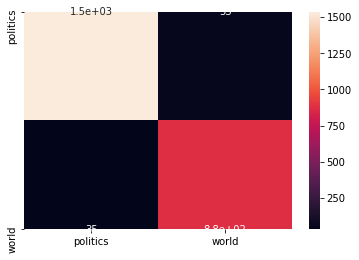

In [59]:
import seaborn as sns
columns = ['politics', 'world']
confusion_scores = sklearn.metrics.confusion_matrix(y_test, grid.predict(X_test))
confusion_df = pd.DataFrame(confusion_scores, columns = columns, index = columns)
sns.heatmap(confusion_df, annot = True)